In [1]:
%pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# python imports
import os
from tqdm import tqdm

# torch imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# helper functions for computer vision
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets

import argparse

import scipy.io

import matplotlib.pyplot as plt
import numpy as np

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
# Import MNIST

from torchvision.datasets import EMNIST
#torchvision.datasets.EMNIST()
# Download and Save MNIST 
digits_train = EMNIST( './emnist_data', train=True, split="mnist", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                                  #transforms.RandomCrop(size = 32, padding = 2, fill=0), 
                                                                                                                  lambda img: torchvision.transforms.functional.rotate(img, -90),
                                                                                                                  lambda img: torchvision.transforms.functional.hflip(img)]))
digits_train_large = EMNIST( './emnist_data', train=True, split="digits", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                                         #transforms.RandomCrop(size = 32, padding = 2, fill=0),
                                                                                                                         lambda img: torchvision.transforms.functional.rotate(img, -90),
                                                                                                                         lambda img: torchvision.transforms.functional.hflip(img)]))
letters_train = EMNIST( './emnist_data', train=True, split="letters", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                                     #transforms.RandomCrop(size = 32, padding = 2, fill=0),
                                                                                                                     lambda img: torchvision.transforms.functional.rotate(img, -90),
                                                                                                                     lambda img: torchvision.transforms.functional.hflip(img)]))
letters_train.targets += 9

digits_test = EMNIST( './emnist_data', train=False, split="mnist", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                                  #transforms.RandomCrop(size = 32, padding = 2, fill=0), 
                                                                                                                  lambda img: torchvision.transforms.functional.rotate(img, -90),
                                                                                                                  lambda img: torchvision.transforms.functional.hflip(img)]))
digits_test_large = EMNIST( './emnist_data', train=False, split="digits", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                                         #transforms.RandomCrop(size = 32, padding = 2, fill=0),
                                                                                                                         lambda img: torchvision.transforms.functional.rotate(img, -90),
                                                                                                                         lambda img: torchvision.transforms.functional.hflip(img)]))
letters_test = EMNIST( './emnist_data', train=False, split="letters", download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                                     #transforms.RandomCrop(size = 32, padding = 2, fill=0),
                                                                                                                     lambda img: torchvision.transforms.functional.rotate(img, -90),
                                                                                                                     lambda img: torchvision.transforms.functional.hflip(img)]))
letters_test.targets += 9

#comb_train = torch.utils.data.ConcatDataset([digits_train,letters_train])
comb_train = digits_train_large
#comb_test = torch.utils.data.ConcatDataset([digits_test,letters_test])
comb_test = digits_test_large
#data_train = torch.utils.data.DataLoader(comb_train , batch_size=128,shuffle=True )

#data_test = torch.utils.data.DataLoader( comb_test , batch_size=128,shuffle=True )
#for batch_idx, samples in enumerate(data_train):
    #print(batch_idx, samples)

In [4]:
comb_train[5][0][0].shape

torch.Size([28, 28])

In [5]:
# for i in range(len(comb_train)):
#     temp = list(comb_train[i])
#     temp_matrix = temp[0][0].clone().T
#     temp[0][0] = temp_matrix
#     comb_train[i] = tuple(temp)

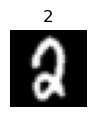

In [7]:
figure = plt.figure(figsize=(1, 1))
cols, rows = 1, 1
sample_idx = 5
img, label = comb_test[sample_idx]
figure.add_subplot(rows, cols, 1)
plt.title(label) 
plt.axis("off")
plt.imshow(img.view(28,28), cmap="gray")
#plt.show()

RuntimeError: shape '[32, 32]' is invalid for input of size 784

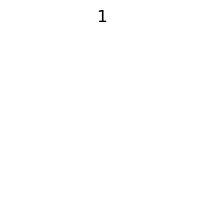

In [8]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(comb_test), size=(1,)).item()
    img, label = comb_test[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label) 
    plt.axis("off")
    plt.imshow(img.view(32,32), cmap="gray")
#plt.show()

In [9]:
class LeNet(nn.Module):
    def __init__(self, input_shape=(28, 28), num_classes=10):
        super(LeNet, self).__init__()
        # certain definitions
        self.num_classes = num_classes
        self.input_shape = input_shape
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        #self.lin1 = nn.Linear(400,120)
        self.lin1 = nn.Linear(784,64)
        #self.lin2 = nn.Linear(120,84)
        self.lin2 = nn.Linear(64,num_classes)
        
    def forward(self, x):
        shape_dict = {}
        
        # neuron network
        #Layer3
        x = torch.flatten(x,1)
        shape_dict[1] = list(x.size())
        #Layer4
        x = F.relu(self.lin1(x))
        shape_dict[2] = list(x.size())
        #Layer5
        # x = F.relu(self.lin2(x))
        # shape_dict[3] = list(x.size())
        #Layer6
        out = self.lin2(x)
        shape_dict[3] = list(out.size())
        # out = self.lin3(x)
        # shape_dict[4] = list(out.size())
        '''
        # CNN
        #Layer1
        x = F.max_pool2d(F.relu(self.conv1(x)),kernel_size=2,stride=2)
        shape_dict[1] = list(x.size())
        #Layer2
        x = F.max_pool2d(F.relu(self.conv2(x)),kernel_size=2,stride=2)
        shape_dict[2] = list(x.size())
        #Layer3
        x = torch.flatten(x,1)
        shape_dict[3] = list(x.size())
        #Layer4
        x = F.relu(self.lin1(x))
        shape_dict[4] = list(x.size())
        #Layer5
        x = F.relu(self.lin2(x))
        shape_dict[5] = list(x.size())
        #Layer6
        out = self.lin3(x)
        shape_dict[6] = list(out.size())
        '''

        return out, shape_dict


def count_model_params():
    '''
    return the number of trainable parameters of LeNet.
    '''
    model = LeNet()
    model_params = 0.0
    for name, param in model.named_parameters():
        temp_result = 1
        for each in param.size():
            temp_result = temp_result*each
        model_params += temp_result
    return model_params/1000000


def train_model(model, train_loader, optimizer, criterion, epoch):
    """
    model (torch.nn.module): The model created to train
    train_loader (pytorch data loader): Training data loader
    optimizer (optimizer.*): A instance of some sort of optimizer, usually SGD
    criterion (nn.CrossEntropyLoss) : Loss function used to train the network
    epoch (int): Current epoch number
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.train()
    train_loss = 0.0
    
    for input, target in tqdm(train_loader, total=len(train_loader)):
        ###################################
        # fill in the standard training loop of forward pass,
        # backward pass, loss computation and optimizer step
        ###################################
        #might want to fix later TODO
        input = input.to(device)
        target = target.to(device)
        
        # 1) zero the parameter gradients
        optimizer.zero_grad()
        # 2) forward + backward + optimize
        output, _ = model(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        # Update the train_loss variable
        # .item() detaches the node from the computational graph
        # Uncomment the below line after you fill block 1 and 2
        train_loss += loss.item()

    train_loss /= len(train_loader)
    print('[Training set] Epoch: {:d}, Average loss: {:.4f}'.format(epoch+1, train_loss))

    return train_loss


def test_model(model, test_loader, epoch):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()
    correct = 0
    with torch.no_grad():
        for input, target in test_loader:
            input = input.to(device)
            target = target.to(device)
            output, _ = model(input)
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_acc = correct / len(test_loader.dataset)
    print('[Test set] Epoch: {:d}, Accuracy: {:.2f}%\n'.format(
        epoch+1, 100. * test_acc))

    return test_acc


In [10]:
def save_checkpoint(state, is_best,
                    file_folder="./outputs/",
                    filename='checkpoint.pth.tar'):
    """save checkpoint"""
    if not os.path.exists(file_folder):
        os.makedirs(os.path.expanduser(file_folder), exist_ok=True)
    torch.save(state, os.path.join(file_folder, filename))
    if is_best:
        # skip the optimization state
        state.pop('optimizer', None)
        torch.save(state, os.path.join(file_folder, 'model_best.pth.tar'))







In [11]:
class MyArgs:
    resume = False #"./outputs/checkpoint.pth.tar"
    epochs = 20
    lr = 0.002
    batch_size = 128
args = MyArgs()

# main function for training and testing

# set up random seed
#torch.manual_seed(0)

###################################
# setup model, loss and optimizer #
###################################

model = LeNet()

training_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=0.9)
# optim.Adam(model.parameters(), lr=args.lr)

# set up transforms to transform the PIL Image to tensors
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

################################
# setup dataset and dataloader #
################################

train_loader = torch.utils.data.DataLoader(comb_train , batch_size=args.batch_size,shuffle=True )
test_loader = torch.utils.data.DataLoader( comb_test , batch_size=args.batch_size,shuffle=True )

################################
# start the training           #
################################
# resume from a previous checkpoint
best_acc = 0.0
start_epoch = 0
if args.resume:
    if os.path.isfile(args.resume):
        print("=> loading checkpoint '{:s}'".format(args.resume))
        checkpoint = torch.load(args.resume)
        start_epoch = checkpoint['epoch']
        best_acc = checkpoint['best_acc']
        # load model weight
        model.load_state_dict(checkpoint['state_dict'])
        # load optimizer states
        optimizer.load_state_dict(checkpoint['optimizer'])
        print("=> loaded checkpoint '{:s}' (epoch {:d}, acc {:0.2f})".format(
            args.resume, checkpoint['epoch'], 100*best_acc))
    else:
        print("=> no checkpoint found at '{}'".format(args.resume))

# training of the model
print("Training the model ...\n")
for epoch in range(start_epoch, args.epochs):
    # train model for 1 epoch
    train_model(model, train_loader, optimizer, training_criterion, epoch)
    # evaluate the model on test_set after this epoch
    acc = test_model(model, test_loader, epoch)
    # save the current checkpoint
    save_checkpoint({
        'epoch': epoch + 1,
        'state_dict': model.state_dict(),
        'best_acc' : max(best_acc, acc),
        'optimizer' : optimizer.state_dict(),
        }, (acc > best_acc))
    best_acc = max(best_acc, acc)
print("Finished Training")

Training the model ...



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:25<00:00, 22.01it/s]


[Training set] Epoch: 1, Average loss: 0.5543
[Test set] Epoch: 1, Accuracy: 92.15%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:24<00:00, 22.20it/s]


[Training set] Epoch: 2, Average loss: 0.2545
[Test set] Epoch: 2, Accuracy: 93.51%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:25<00:00, 21.96it/s]


[Training set] Epoch: 3, Average loss: 0.2170
[Test set] Epoch: 3, Accuracy: 94.31%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:25<00:00, 22.03it/s]


[Training set] Epoch: 4, Average loss: 0.1918
[Test set] Epoch: 4, Accuracy: 94.90%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:24<00:00, 22.27it/s]


[Training set] Epoch: 5, Average loss: 0.1719
[Test set] Epoch: 5, Accuracy: 95.39%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:26<00:00, 21.69it/s]


[Training set] Epoch: 6, Average loss: 0.1560
[Test set] Epoch: 6, Accuracy: 95.77%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:25<00:00, 21.88it/s]


[Training set] Epoch: 7, Average loss: 0.1431
[Test set] Epoch: 7, Accuracy: 96.10%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:27<00:00, 21.51it/s]


[Training set] Epoch: 8, Average loss: 0.1325
[Test set] Epoch: 8, Accuracy: 96.37%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:25<00:00, 21.99it/s]


[Training set] Epoch: 9, Average loss: 0.1236
[Test set] Epoch: 9, Accuracy: 96.59%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:25<00:00, 21.93it/s]


[Training set] Epoch: 10, Average loss: 0.1162
[Test set] Epoch: 10, Accuracy: 96.76%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:25<00:00, 21.83it/s]


[Training set] Epoch: 11, Average loss: 0.1098
[Test set] Epoch: 11, Accuracy: 96.95%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:25<00:00, 21.82it/s]


[Training set] Epoch: 12, Average loss: 0.1044
[Test set] Epoch: 12, Accuracy: 97.05%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:25<00:00, 21.96it/s]


[Training set] Epoch: 13, Average loss: 0.0995
[Test set] Epoch: 13, Accuracy: 97.16%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:25<00:00, 21.88it/s]


[Training set] Epoch: 14, Average loss: 0.0953
[Test set] Epoch: 14, Accuracy: 97.29%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:26<00:00, 21.62it/s]


[Training set] Epoch: 15, Average loss: 0.0914
[Test set] Epoch: 15, Accuracy: 97.39%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:26<00:00, 21.80it/s]


[Training set] Epoch: 16, Average loss: 0.0879
[Test set] Epoch: 16, Accuracy: 97.45%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:25<00:00, 21.98it/s]


[Training set] Epoch: 17, Average loss: 0.0849
[Test set] Epoch: 17, Accuracy: 97.58%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:26<00:00, 21.80it/s]


[Training set] Epoch: 18, Average loss: 0.0821
[Test set] Epoch: 18, Accuracy: 97.60%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:26<00:00, 21.69it/s]


[Training set] Epoch: 19, Average loss: 0.0795
[Test set] Epoch: 19, Accuracy: 97.66%



100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [01:25<00:00, 21.82it/s]


[Training set] Epoch: 20, Average loss: 0.0771
[Test set] Epoch: 20, Accuracy: 97.74%

Finished Training


In [12]:
model

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (lin1): Linear(in_features=784, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=10, bias=True)
)

In [13]:
count_model_params() *1000000

53462.0

In [14]:
model.lin1.weight

Parameter containing:
tensor([[-0.0270, -0.0192, -0.0298,  ...,  0.0139,  0.0238,  0.0304],
        [-0.0343, -0.0235, -0.0044,  ..., -0.0180,  0.0076, -0.0225],
        [-0.0253, -0.0183, -0.0170,  ..., -0.0110, -0.0261,  0.0328],
        ...,
        [ 0.0329, -0.0170, -0.0136,  ...,  0.0247, -0.0033,  0.0128],
        [ 0.0084,  0.0289, -0.0187,  ...,  0.0316, -0.0141, -0.0178],
        [-0.0255,  0.0194,  0.0118,  ...,  0.0182,  0.0015,  0.0234]],
       requires_grad=True)

In [15]:
len(model.lin1.weight.reshape(-1))

50176

In [22]:
import struct
write_file = open('weightfix.hex', 'w')
for i in range(len(model.lin1.weight.reshape(-1))):
    s_print = "@"+hex(i)[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', model.lin1.weight.reshape(-1)[i].item()))[0])[2:].zfill(8)
    write_file.write(s_print.strip()+'\n')
write_file.close()

In [23]:
for i in range(len(model.lin2.weight.reshape(-1))):
    print("@"+hex(i+len(model.lin1.weight.reshape(-1)))[2:].zfill(4)+" "+hex(struct.unpack('<I', struct.pack('<f', model.lin2.weight.reshape(-1)[i].item()))[0])[2:].zfill(8), end="|")
print()

@c400 3d82e19b|@c401 3e3c6cee|@c402 bf07cef1|@c403 3de77e8d|@c404 3ee55647|@c405 be75f5a7|@c406 bd9cf0ec|@c407 3e1cd669|@c408 3ed2c6b3|@c409 be96a05c|@c40a 3e9b1cea|@c40b 3e6292e5|@c40c be541d53|@c40d 3d7186d6|@c40e bd99809f|@c40f bd789cdd|@c410 3eab56ee|@c411 bea3d471|@c412 3da75720|@c413 3dd5efb2|@c414 3e9981f0|@c415 3e5c2bd7|@c416 be03fa0e|@c417 bd429d9d|@c418 bed093db|@c419 bf147746|@c41a 3ef1bc48|@c41b 3edec1ad|@c41c be004451|@c41d 3f26cbdb|@c41e 3d94cb08|@c41f be76bb90|@c420 3e8d4f16|@c421 3e3ec2d8|@c422 bf14ac4c|@c423 3d849222|@c424 be59723a|@c425 bdf9be3c|@c426 3ee2ef04|@c427 be362856|@c428 3e4eace0|@c429 bedce75f|@c42a bf0d4cde|@c42b bd47a1f7|@c42c 3e8e72c8|@c42d beb6f88b|@c42e befcf4e8|@c42f bed65f1a|@c430 be468093|@c431 3eba1929|@c432 bc8d2bce|@c433 bf18eaf0|@c434 3d8d9c2c|@c435 3d13c662|@c436 3eb3c91b|@c437 bf261ae6|@c438 3eb7fce7|@c439 3c24d928|@c43a be65aaf7|@c43b bebbda6d|@c43c be358772|@c43d 3c71e717|@c43e be5d3139|@c43f be876ab4|@c440 3e9f493f|@c441 be1bc127|@c442 be52

In [24]:
count_model_params() * 1000000

53462.0

In [36]:
with open('fixed_image.hex','r') as file:
    img = file.read().split("\n")
hex_num = []
for i in range(len(img)):
    if img[i][6:] != '':
        hex_num.append(img[i][6:])
len(hex_num)

784

In [39]:
int_num = []
for i in range(len(hex_num)):
    int_num.append(int(hex_num[i], 16))
len(int_num)

784

In [52]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()
correct = 0
with torch.no_grad():
    input = torch.FloatTensor(int_num).reshape(1, 784)
    input = input.to(device)
    output, _ = model(input)
output

tensor([[ -894.3608, -1501.9448,  3083.2507,  1188.5089,  -864.6537,  -882.4614,
          -802.2708,  -210.8804,   569.8717,    87.4840]])

In [61]:
max(output.reshape(10).tolist())

3083.250732421875

In [62]:
output.reshape(10).tolist().index(max(output.reshape(10).tolist()))

2

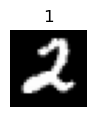

In [65]:
figure = plt.figure(figsize=(1, 1))
cols, rows = 1, 1
sample_idx = 5
figure.add_subplot(rows, cols, 1)
plt.title(label) 
plt.axis("off")
plt.imshow(torch.FloatTensor(int_num).view(28,28), cmap="gray")